# arXiv Monthly Submissions & Downloads

### Caveats
Here are some caveats to consider, taken from the [arXiv website](https://arxiv.org).
> _While we have attempted to extract download data representing unique full-text downloads by real users, there are mnay factors which affect accuracy. These factors include:_
    >>1. _the data is from the main [arXiv site](https://arxiv.org) and the arXiv mirrors, though some mirror data is incomplete;_
    >>2. _only web downloads are included (and not FTP or email "downloads" that were formerly supported);_
    >>3. _we have counted downloads according to the COUNTER algorithm which excludes rapid repeat downloads;_
    >>4. _we have attempted to identify and remove robot or automated downloads from the count (false positives lead to undercounting, failing to identify robots leads to overcounting);_
    >>5. _data prior to 2009 has not been cleaned with as much care as later data, it shows trends nonetheless._

In [ ]:
# The usual suspects ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pdvega as pdv

# And their accomplices ...
from warnings import filterwarnings
from statsmodels.tsa.stattools import adfuller

# Plotting settings
sns.set(context='notebook', style='whitegrid', palette='deep', rc=None)
filterwarnings('ignore')

In [2]:
# Getting the data
downloads = pd.read_csv(
    '.../arxiv/get_monthly_downloads_extracted_05-04-2018.csv')
submissions = pd.read_csv(
    '.../arxiv/get_monthly_submissions_extracted-05-04-2018.csv')
data = pd.merge(submissions, downloads, on='month')

# Create a new file with the combined data
data.to_csv(
    '.../arxiv/combined_submissions_and_downloads.csv', 
    sep=',')

Inspecting the dataset.

In [3]:
# Shape
data.shape

(290, 4)

In [4]:
# List of columns
data.columns

Index(['month', 'submissions', 'historical_delta', 'downloads'], dtype='object')

In [5]:
# Column data types
data.dtypes

month               object
submissions          int64
historical_delta     int64
downloads            int64
dtype: object

In [6]:
# Top 10 rows
data.head(10)

,month,submissions,historical_delta,downloads
0,1994-01,582,-28,0
1,1994-02,634,-19,1863
2,1994-03,729,-24,7048
3,1994-04,699,-39,6814
4,1994-05,823,-18,9601
5,1994-06,856,-32,11007
6,1994-07,840,-23,9488
7,1994-08,746,-20,10789
8,1994-09,851,-33,12872
9,1994-10,909,-23,16260


In [7]:
# Bottom 10 rows
data.tail(10)

,month,submissions,historical_delta,downloads
280,2017-05,11194,0,14894937
281,2017-06,10297,0,14372378
282,2017-07,9980,0,14808475
283,2017-08,9854,0,15915733
284,2017-09,10517,0,16999890
285,2017-10,11627,0,19433648
286,2017-11,11589,0,18885644
287,2017-12,10332,0,17361253
288,2018-01,10609,0,18445580
289,2018-02,10593,0,17704444


In [8]:
# Description
data.describe()

,submissions,historical_delta,downloads
count,290.000000,290.000000,2.900000e+02
mean,4662.703448,-6.575862,3.709525e+06
std,2803.957369,11.616244,4.453700e+06
min,582.000000,-49.000000,0.000000e+00
25%,2428.500000,-7.000000,6.735292e+05
50%,4112.500000,0.000000,2.067751e+06
75%,6726.000000,0.000000,4.982482e+06
max,11627.000000,0.000000,1.943365e+07


In [9]:
# Missing data
data.isnull().sum()

month               0
submissions         0
historical_delta    0
downloads           0
dtype: int64

Our dataset has 4 columns:
 
 >1. `month` : month of activity
 >2. `submissions` : number of submissions made on a particular month
 >3. `historical_delta` : *
 >4. `downloads` : number of downloads made on a particular month
 
and 290 rows with not missing values. We'll now proceed with further cleaning of our data.
 
 >- `month` is a _string_ object and needs to be changed into a _datetime_ object

In [10]:
# Changing month to 'datetime'
data.month = pd.to_datetime(data.month, yearfirst=True, format="%Y-%m")
data.dtypes

month               datetime64[ns]
submissions                  int64
historical_delta             int64
downloads                    int64
dtype: object

In [11]:
# Top 10 rows
data.head(10)

,month,submissions,historical_delta,downloads
0,1994-01-01,582,-28,0
1,1994-02-01,634,-19,1863
2,1994-03-01,729,-24,7048
3,1994-04-01,699,-39,6814
4,1994-05-01,823,-18,9601
5,1994-06-01,856,-32,11007
6,1994-07-01,840,-23,9488
7,1994-08-01,746,-20,10789
8,1994-09-01,851,-33,12872
9,1994-10-01,909,-23,16260


In [12]:
# Bottom 10 rows
data.tail(10)

,month,submissions,historical_delta,downloads
280,2017-05-01,11194,0,14894937
281,2017-06-01,10297,0,14372378
282,2017-07-01,9980,0,14808475
283,2017-08-01,9854,0,15915733
284,2017-09-01,10517,0,16999890
285,2017-10-01,11627,0,19433648
286,2017-11-01,11589,0,18885644
287,2017-12-01,10332,0,17361253
288,2018-01-01,10609,0,18445580
289,2018-02-01,10593,0,17704444


In [13]:
# Description
data.describe()

,submissions,historical_delta,downloads
count,290.000000,290.000000,2.900000e+02
mean,4662.703448,-6.575862,3.709525e+06
std,2803.957369,11.616244,4.453700e+06
min,582.000000,-49.000000,0.000000e+00
25%,2428.500000,-7.000000,6.735292e+05
50%,4112.500000,0.000000,2.067751e+06
75%,6726.000000,0.000000,4.982482e+06
max,11627.000000,0.000000,1.943365e+07


We have successfully changed the `month` into a _datetime_ object.

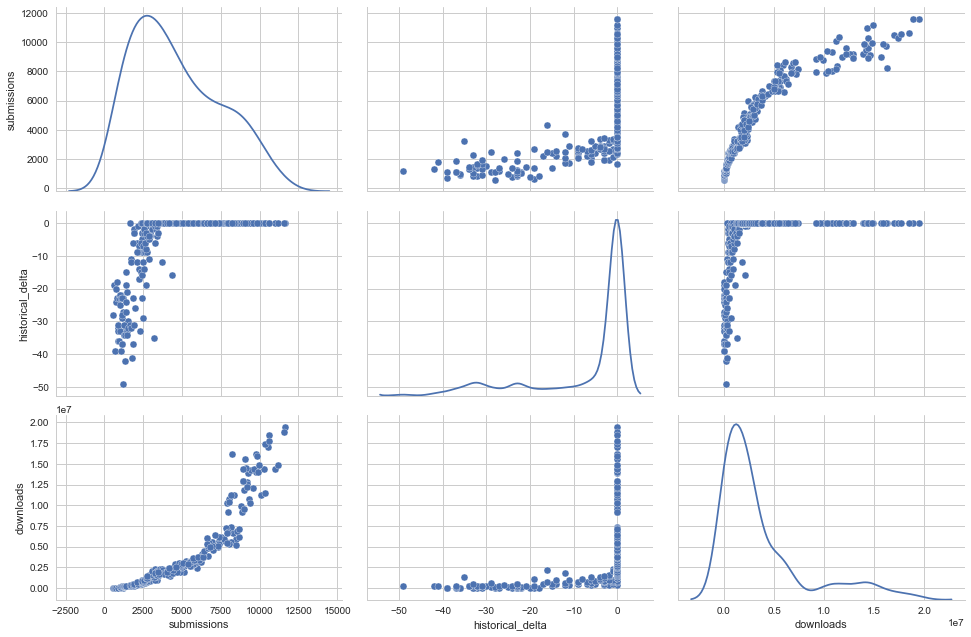

In [14]:
# Plotting
sns.pairplot(data, diag_kind='kde', size=3, aspect=1.5)

***

### Number of submissions and downloads

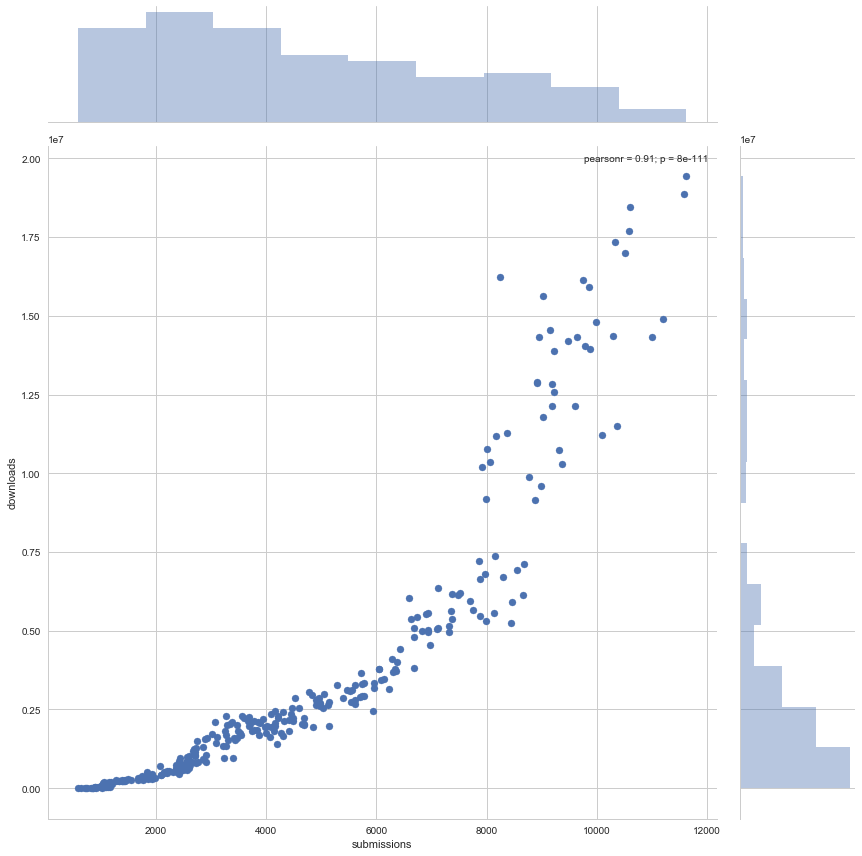

In [15]:
# Number of submissions vs. number of downloads
sns.jointplot(data=data, x='submissions', y='downloads', size=12)

Plotting the number of submissions against downloads, we find a strong linear correlation of $.91$ between the two variables. This tells us that as the number of submissions increases, so does the number of downloads.

From the scatterplot, we also find that submissions are more densely distributed in the range of $1 - 8000$. While on the other hand, downloads are more densely distributed in the range of $0 - 7.5$ million.

***

#### Submissions

Text(0,0.5,'Submissions')

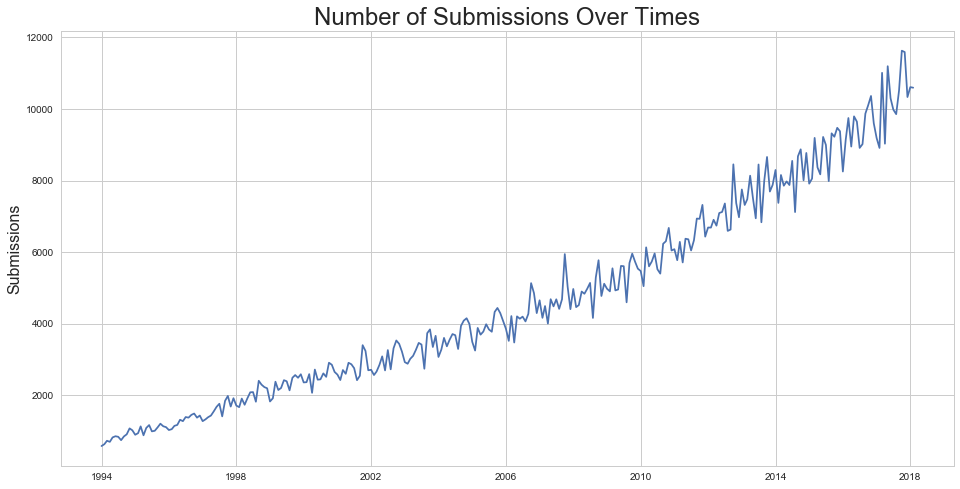

In [16]:
# Number of submissions over time
plt.figure(figsize=(16, 8))
plt.plot(data.month, data.submissions)
plt.title('Number of Submissions Over Times', fontsize=24)
plt.ylabel('Submissions', fontsize=16)

There has been a general upward trend in the number of submissions from $1994 - 2017$. There are relatively fewer flactuations in the period between $1994 - 2002$ compared to the period between $2003$ to the present date.

#### Stationarity of Submissions

In [17]:
# Testing for stationarity
def test_stationarity(data):
    
    #Determing rolling statistics
    rolmean = data.rolling(window=12, center=False).mean().dropna()
    rolstd = data.rolling(window=12, center=False).std().dropna()

    #Plot rolling statistics:
    plt.figure(figsize=(16, 8))
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation', fontsize=24)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    try:
        dftest = adfuller(data, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value ({})'.format(key)] = value
        print(dfoutput)
    except ValueError as a:
        print(a)
    except NameError as c:
        print(c)

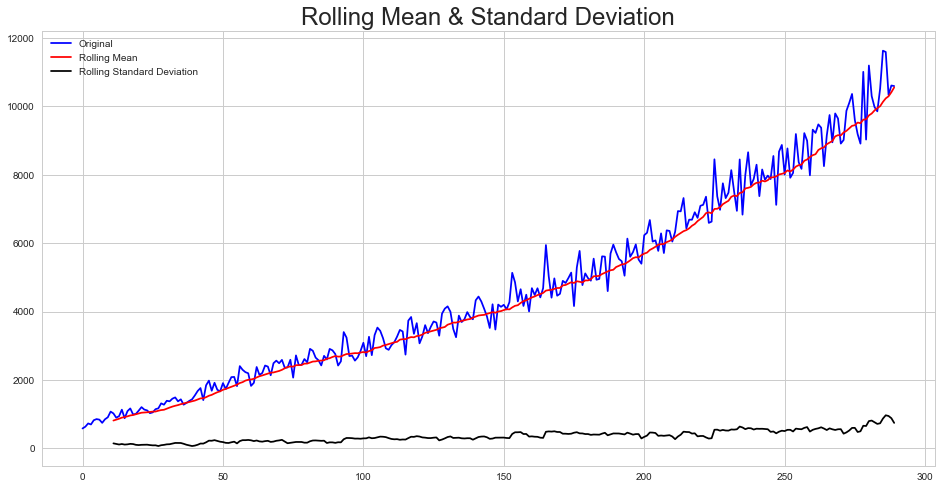

Results of Dickey-Fuller Test:
Test Statistic                   4.476636
p-value                          1.000000
#Lags Used                      15.000000
Number of Observations Used    274.000000
Critical Value (1%)             -3.454444
Critical Value (5%)             -2.872147
Critical Value (10%)            -2.572422
dtype: float64


In [18]:
test_stationarity(data.submissions)

We clearly have a rising trend over time. _This is not a stationary time series_. This can be observed from the rising mean, even though the standard deviation remains low.

We will now try to reducing the trend using logarithms. The intention is to penalize higher values more than lower values resulting in a flatter or less steeep trend.

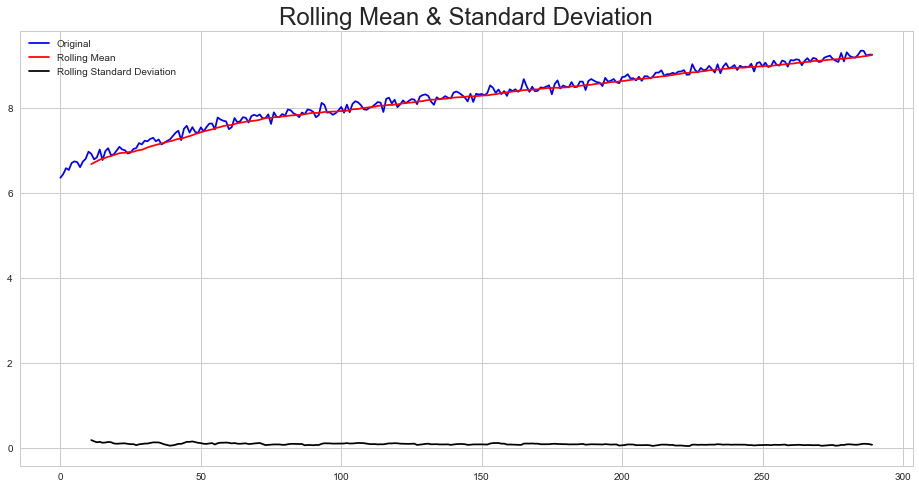

Results of Dickey-Fuller Test:
Test Statistic                  -3.579391
p-value                          0.006167
#Lags Used                      14.000000
Number of Observations Used    275.000000
Critical Value (1%)             -3.454355
Critical Value (5%)             -2.872108
Critical Value (10%)            -2.572401
dtype: float64


In [19]:
# Reducing the trend by applying logarithms
submissions_log = np.log(data.submissions)

# Testing for stationarity
test_stationarity(submissions_log)

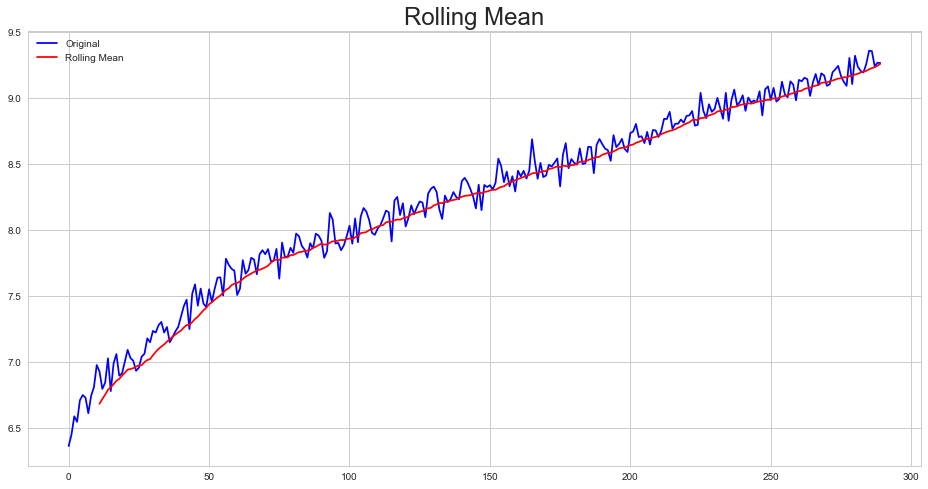

In [20]:
# Rolling mean
submissions_log_moving_average = submissions_log.rolling(window=12, center=False).mean()

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(submissions_log, color='blue',label='Original')
plt.plot(submissions_log_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean', fontsize=24)
plt.show(block=False)

The logarithms have tried to remove some of the steep trend and has also made the standard much more flat. However, closer inspection shows that we still have a rising trend

***
#### Historical Delta ($h_\delta$)

Text(0,0.5,'Downloads')

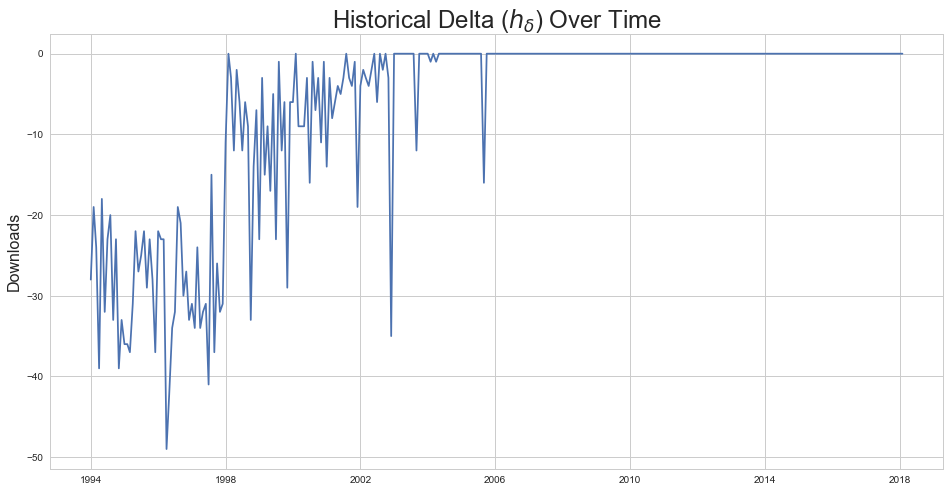

In [21]:
# Historical delta over time
plt.figure(figsize=(16, 8))
plt.plot(data.month, data.historical_delta)
plt.title('Historical Delta ($h_{\delta}$) Over Time', fontsize=24)
plt.ylabel('Downloads', fontsize=16)

#### Stationarity of Historical Delta ($h_{\delta}$)

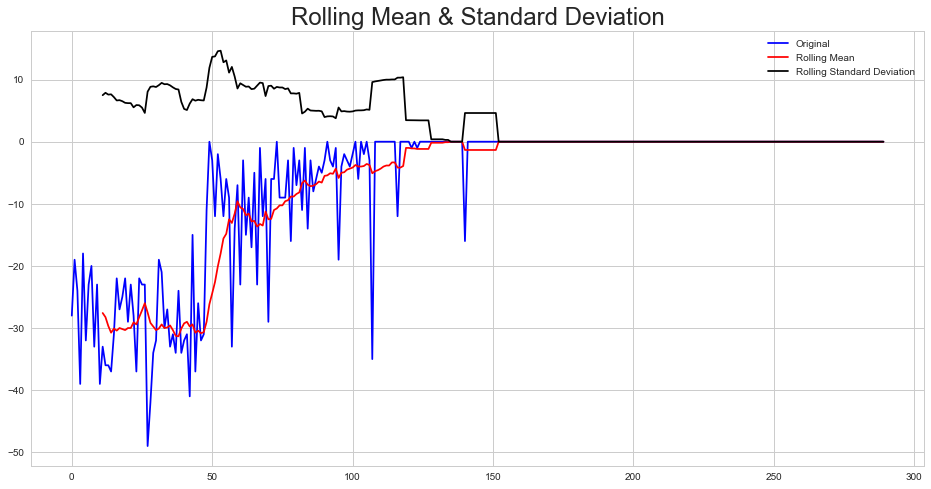

Results of Dickey-Fuller Test:
Test Statistic                  -2.263350
p-value                          0.184061
#Lags Used                      11.000000
Number of Observations Used    278.000000
Critical Value (1%)             -3.454094
Critical Value (5%)             -2.871993
Critical Value (10%)            -2.572340
dtype: float64


In [22]:
test_stationarity(data.historical_delta)

The _historical delta_ does not seem to show and trend or seasonality overtime. There are severe flactuations in the earlier years between $1994 - 2003$. After this period, the values are flatter along $0$.

Results from the Dickey-Fuller test show a test statistic value of $-2.27$, which is close to the critical values, further justifying a lack of trend.

***

#### Downloads

Text(0,0.5,'Downloads')

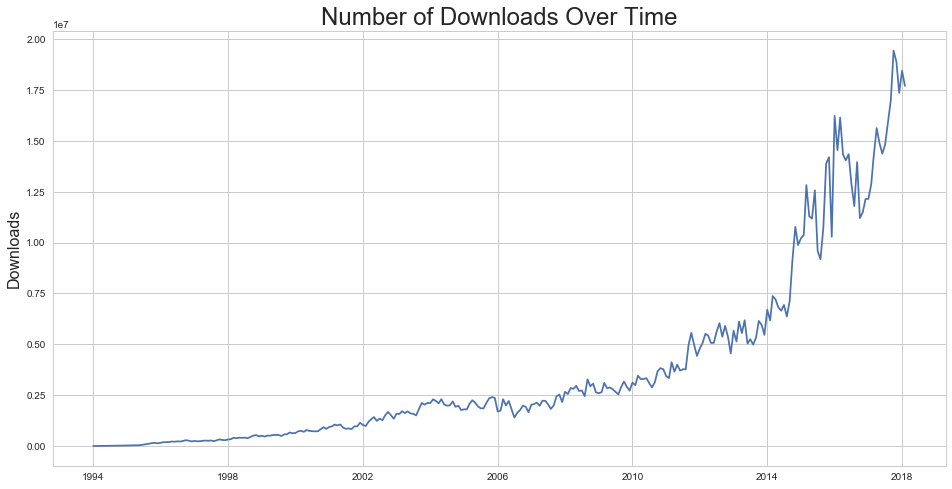

In [23]:
# Number of downloads over time
plt.figure(figsize=(16, 8))
plt.plot(data.month, data.downloads)
plt.title('Number of Downloads Over Time', fontsize=24)
plt.ylabel('Downloads', fontsize=16)

Over time, downloads show a rising trend from $1995$ and gained a lot of momentum in $2012$. The years after $2012$ show significant increases, however there is a decrease in $2016$. After the drop in $2016$, the number of downloads rises even higher reaching a peak of close to 2 million downloads towards the end of $2017$.

#### Stationarity of Downloads

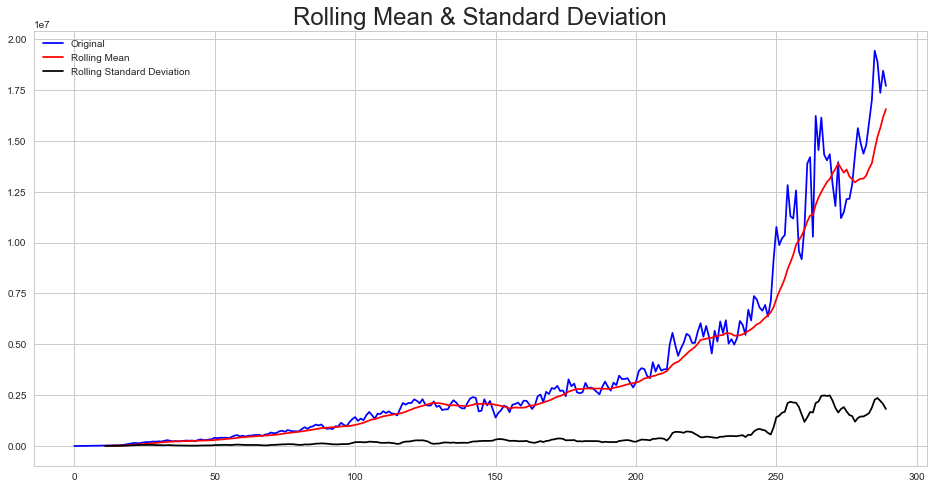

Results of Dickey-Fuller Test:
Test Statistic                   4.001266
p-value                          1.000000
#Lags Used                      10.000000
Number of Observations Used    279.000000
Critical Value (1%)             -3.454008
Critical Value (5%)             -2.871956
Critical Value (10%)            -2.572320
dtype: float64


In [24]:
test_stationarity(data.downloads)

The Dickey-Fuller test shows a high test statistic relative to the sub-zero critical values. This means the number of downloads have a rolling mean that rises over time even though the standard deviation remains relatively low.

We also try to remove the trend in the downloads data by apply logarithms.

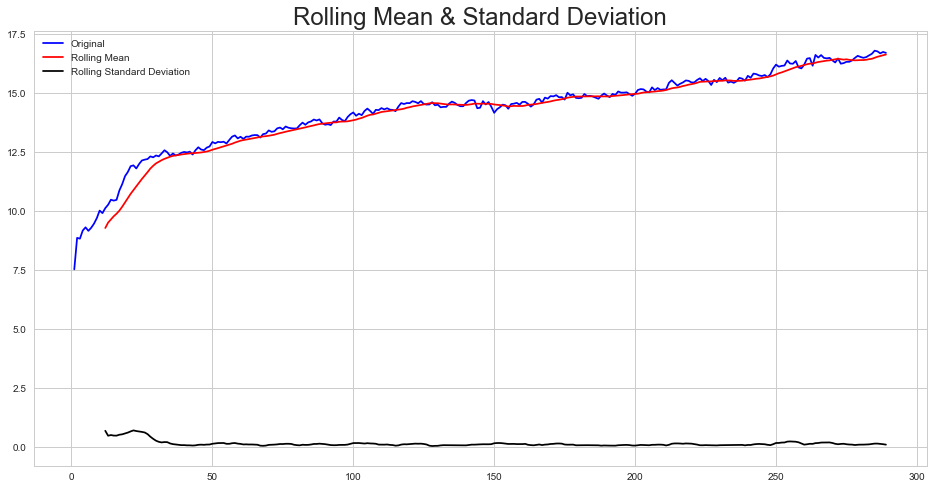

Results of Dickey-Fuller Test:
Test Statistic                        NaN
p-value                               NaN
#Lags Used                      12.000000
Number of Observations Used    277.000000
Critical Value (1%)             -3.454180
Critical Value (5%)             -2.872031
Critical Value (10%)            -2.572360
dtype: float64


In [25]:
# Reducing the trend by applying logarithms
downloads_log = np.log(data.downloads)

# Testing for stationarity
test_stationarity(downloads_log)

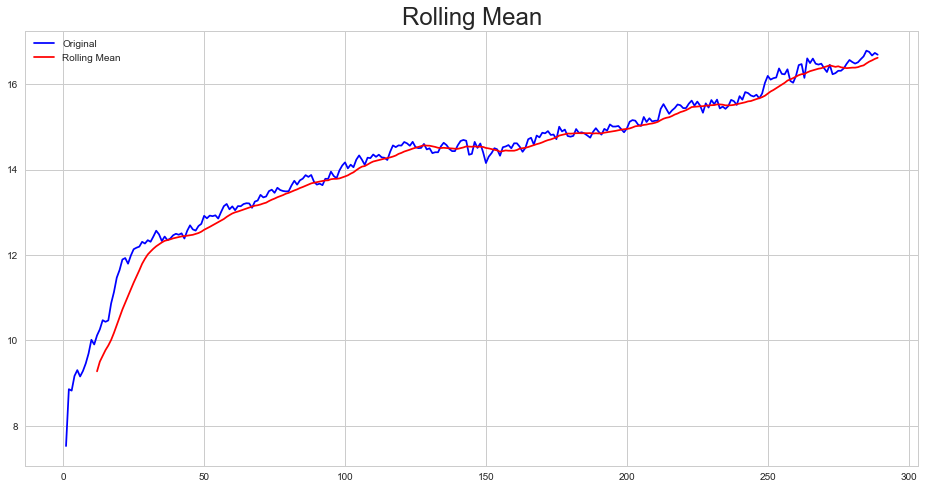

In [26]:
# Rolling mean
downloads_log_moving_average = downloads_log.rolling(window=12, center=False).mean()

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(downloads_log, color='blue',label='Original')
plt.plot(downloads_log_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean', fontsize=24)
plt.show(block=False)

From the trend-reduced downloads data, we have an _undefined_ test statistic value. This means we may need to try a different method to reduce the trend.

***